In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Goal of the Competition**

The goal of this competition is to detect freezing of gait (FOG), a debilitating symptom that afflicts many people with Parkinson’s disease. You will develop a machine learning model trained on data collected from a wearable 3D lower back sensor.

Your work will help researchers better understand when and why FOG episodes occur. This will improve the ability of medical professionals to optimally evaluate, monitor, and ultimately, prevent FOG events.

**I will continue to work and update this notebook. Please upvote it if you find it useful in this interesting challenge!**

## **Context**

An estimated 7 to 10 million people around the world have Parkinson’s disease, many of whom suffer from freezing of gait (FOG). During a FOG episode, a patient's feet are “glued” to the ground, preventing them from moving forward despite their attempts. FOG has a profound negative impact on health-related quality of life—people who suffer from FOG are often depressed, have an increased risk of falling, are likelier to be confined to wheelchair use, and have restricted independence.

While researchers have multiple theories to explain when, why, and in whom FOG occurs, there is still no clear understanding of its causes. The ability to objectively and accurately quantify FOG is one of the keys to advancing its understanding and treatment. Collection and analysis of FOG events, such as with your data science skills, could lead to potential treatments.

There are many methods of evaluating FOG, though most involve FOG-provoking protocols. People with FOG are filmed while performing certain tasks that are likely to increase its occurrence. Experts then review the video to score each frame, indicating when FOG occurred. While scoring in this manner is relatively reliable and sensitive, it is extremely time-consuming and requires specific expertise. Another method involves augmenting FOG-provoking testing with wearable devices. With more sensors, the detection of FOG becomes easier, however, compliance and usability may be reduced. Therefore, a combination of these two methods may be the best approach. When combined with machine learning methods, the accuracy of detecting FOG from a lower back accelerometer is relatively high. However, the datasets used to train and test these algorithms have been relatively small and generalizability is limited to date. Furthermore, the emphasis has been on achieving high levels of accuracy, while precision, for example, has largely been ignored.

Competition host, the Center for the Study of Movement, Cognition, and Mobility (CMCM), Neurological Institute, Tel Aviv Sourasky Medical Center, aims to improve the personalized treatment of age-related movement, cognition, and mobility disorders and to alleviate the associated burden. They leverage a combination of clinical, engineering, and neuroscience expertise to: 1) Gain new understandings into the physiologic and pathophysiologic mechanisms that contribute to cognitive and motor function, the factors that influence these functions, and their changes with aging and disease (e.g., Parkinson’s disease, Alzheimer’s). 2) Develop new methods and tools for the early detection and tracking of cognitive and motor decline. A major focus is on using leveraging wearable devices and digital technologies; and 3) Develop and evaluate novel methods for the prevention and treatment of gait, falls, and cognitive function.

Your work will help advance the evaluation, understanding and treatment of FOG, improving the lives of the many people who suffer from this debilitating Parkinson’s disease symptom.

## **File and Field Descriptions**

**train/** Folder containing the data series in the training set within three subfolders: **tdcsfog/**, **defog/**, and **notype/**. Series in the notype folder are from the defog dataset but lack event-type annotations. The fields present in these series vary by folder.

* **Time** An integer timestep. Series from the tdcsfog dataset are recorded at 128Hz (128 timesteps per second), while series from the **defog** and **daily** series are recorded at 100Hz (100 timesteps per second).
* **AccV**, **AccML**, and **AccAP** Acceleration in units of g, from a lower-back sensor on three axes: V - vertical, ML - mediolateral, AP - anteroposterior.
* **StartHesitation**, **Turn**, **Walking** Indicator variables for the occurrence of each of the event types.
* **Event** Indicator variable for the occurrence of any FOG-type event. Present only in the notype series, which lack type-level annotations.
* **Valid** There were cases during the video annotation that were hard for the annotator to decide if there was an Akinetic (i.e., essentially no movement) FoG or the subject stopped voluntarily. Only event annotations where the series is marked true should be considered as unambiguous.
* **Task** Series were only annotated where this value is true. Portions marked false should be considered unannotated.

In [2]:
defog_example = pd.read_csv('C:\Users\congnetive_computing\Desktop\DataRead\dataset.xlsx')
defog_example

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.002697,0.022371,0.068304,0,0,0,False,False
1,1,-1.002641,0.019173,0.066162,0,0,0,False,False
2,2,-0.999820,0.019142,0.067536,0,0,0,False,False
3,3,-0.998023,0.018378,0.068409,0,0,0,False,False
4,4,-0.998359,0.016726,0.066448,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
118865,118865,-1.001893,0.053704,-0.006347,0,0,0,False,False
118866,118866,-1.005036,0.051916,-0.008076,0,0,0,False,False
118867,118867,-1.005337,0.052860,-0.009193,0,0,0,False,False
118868,118868,-1.003345,0.057860,-0.007546,0,0,0,False,False


In [3]:
# get a summary of the data
print(defog_example.describe())

# check for missing values
print(defog_example.isnull().sum())

# check the data types of columns
print(defog_example.dtypes)

# check the correlation between variables
print(defog_example.corr())

                Time           AccV          AccML          AccAP  \
count  118870.000000  118870.000000  118870.000000  118870.000000   
mean    59434.500000      -0.956294       0.014926       0.146846   
std     34314.957587       0.123618       0.079237       0.244915   
min         0.000000      -3.406332      -0.799892      -0.960941   
25%     29717.250000      -0.995688      -0.012962       0.009221   
50%     59434.500000      -0.984641       0.014863       0.141871   
75%     89151.750000      -0.961288       0.042899       0.209394   
max    118869.000000      -0.227743       1.182802       1.034753   

       StartHesitation           Turn        Walking  
count         118870.0  118870.000000  118870.000000  
mean               0.0       0.037781       0.000673  
std                0.0       0.190666       0.025934  
min                0.0       0.000000       0.000000  
25%                0.0       0.000000       0.000000  
50%                0.0       0.000000       0.00

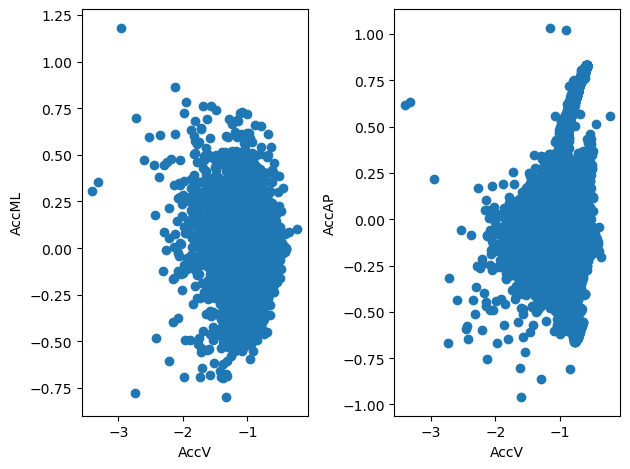

In [4]:
# create a scatter plot of AccV and AccML
plt.subplot(1, 2, 1)
plt.scatter(defog_example['AccV'], defog_example['AccML'])
plt.xlabel('AccV')
plt.ylabel('AccML')

# create a scatter plot of AccV and AccAP
plt.subplot(1, 2, 2)
plt.scatter(defog_example['AccV'], defog_example['AccAP'])
plt.xlabel('AccV')
plt.ylabel('AccAP')

# Adjust the layout of the subplots
plt.tight_layout()

# display the subplots
plt.show()

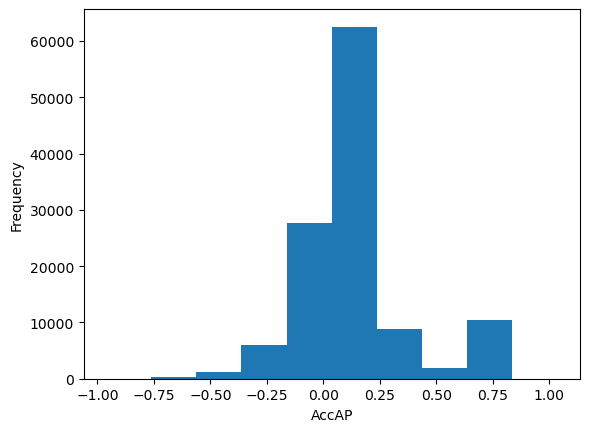

In [5]:
# create a histogram of AccAP
plt.hist(defog_example['AccAP'])
plt.xlabel('AccAP')
plt.ylabel('Frequency')
plt.show()

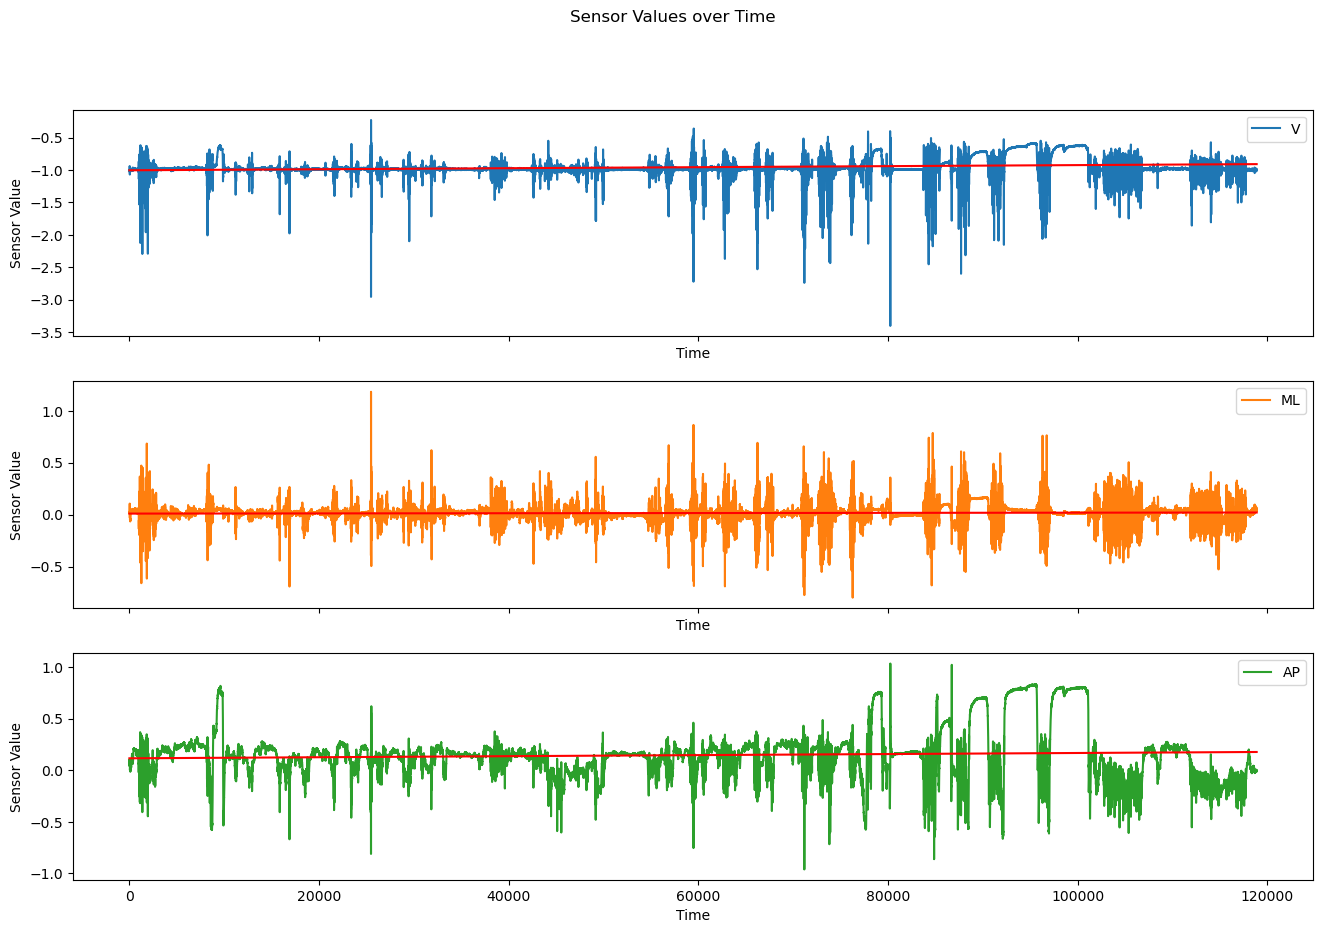

In [6]:
fig, axes = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(16,10))
fig.suptitle('Sensor Values over Time')

data = {'V': defog_example.AccV, 'ML': defog_example.AccML, 'AP': defog_example.AccAP}

for i, (name, values) in enumerate(data.items()):
    ax = axes[i]
    ax.plot(values, label=name, color=f'C{i}')
    a, b = np.polyfit(values.index, values, 1)
    ax.plot(values.index, a*values.index+b, color='red')
    ax.set_xlabel('Time')
    ax.set_ylabel('Sensor Value')
    ax.legend()

plt.show()

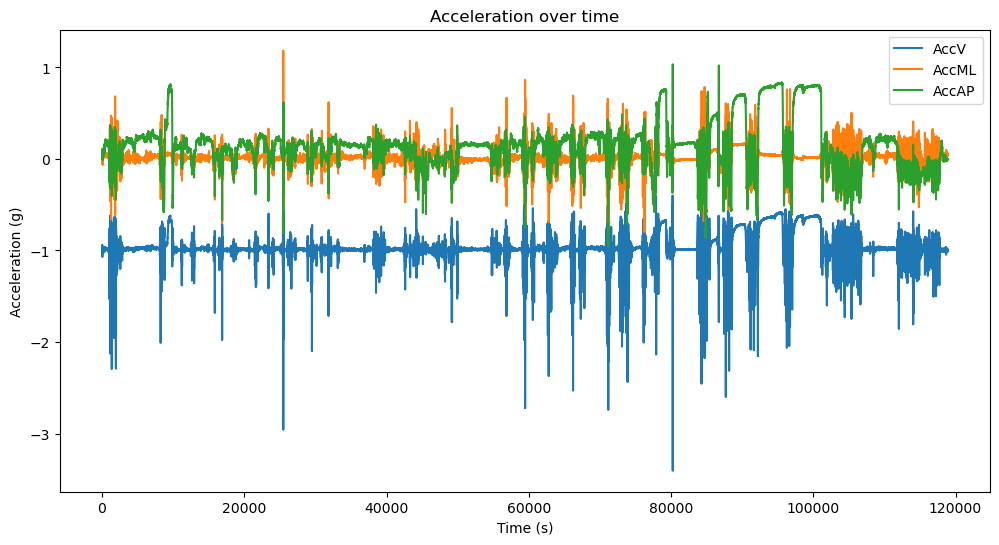

In [7]:
# Plot acceleration on each axis over time
fig, ax = plt.subplots(figsize=(12,6))
defog_example.plot(x='Time', y=['AccV', 'AccML', 'AccAP'], ax=ax);
ax.set_xlabel('Time (s)');
ax.set_ylabel('Acceleration (g)');
ax.set_title('Acceleration over time');

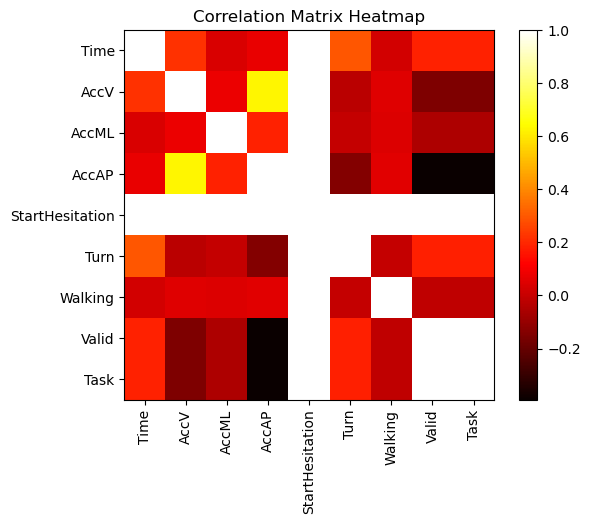

In [8]:
# create a heatmap of the correlation matrix
corr_matrix = defog_example.corr()
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


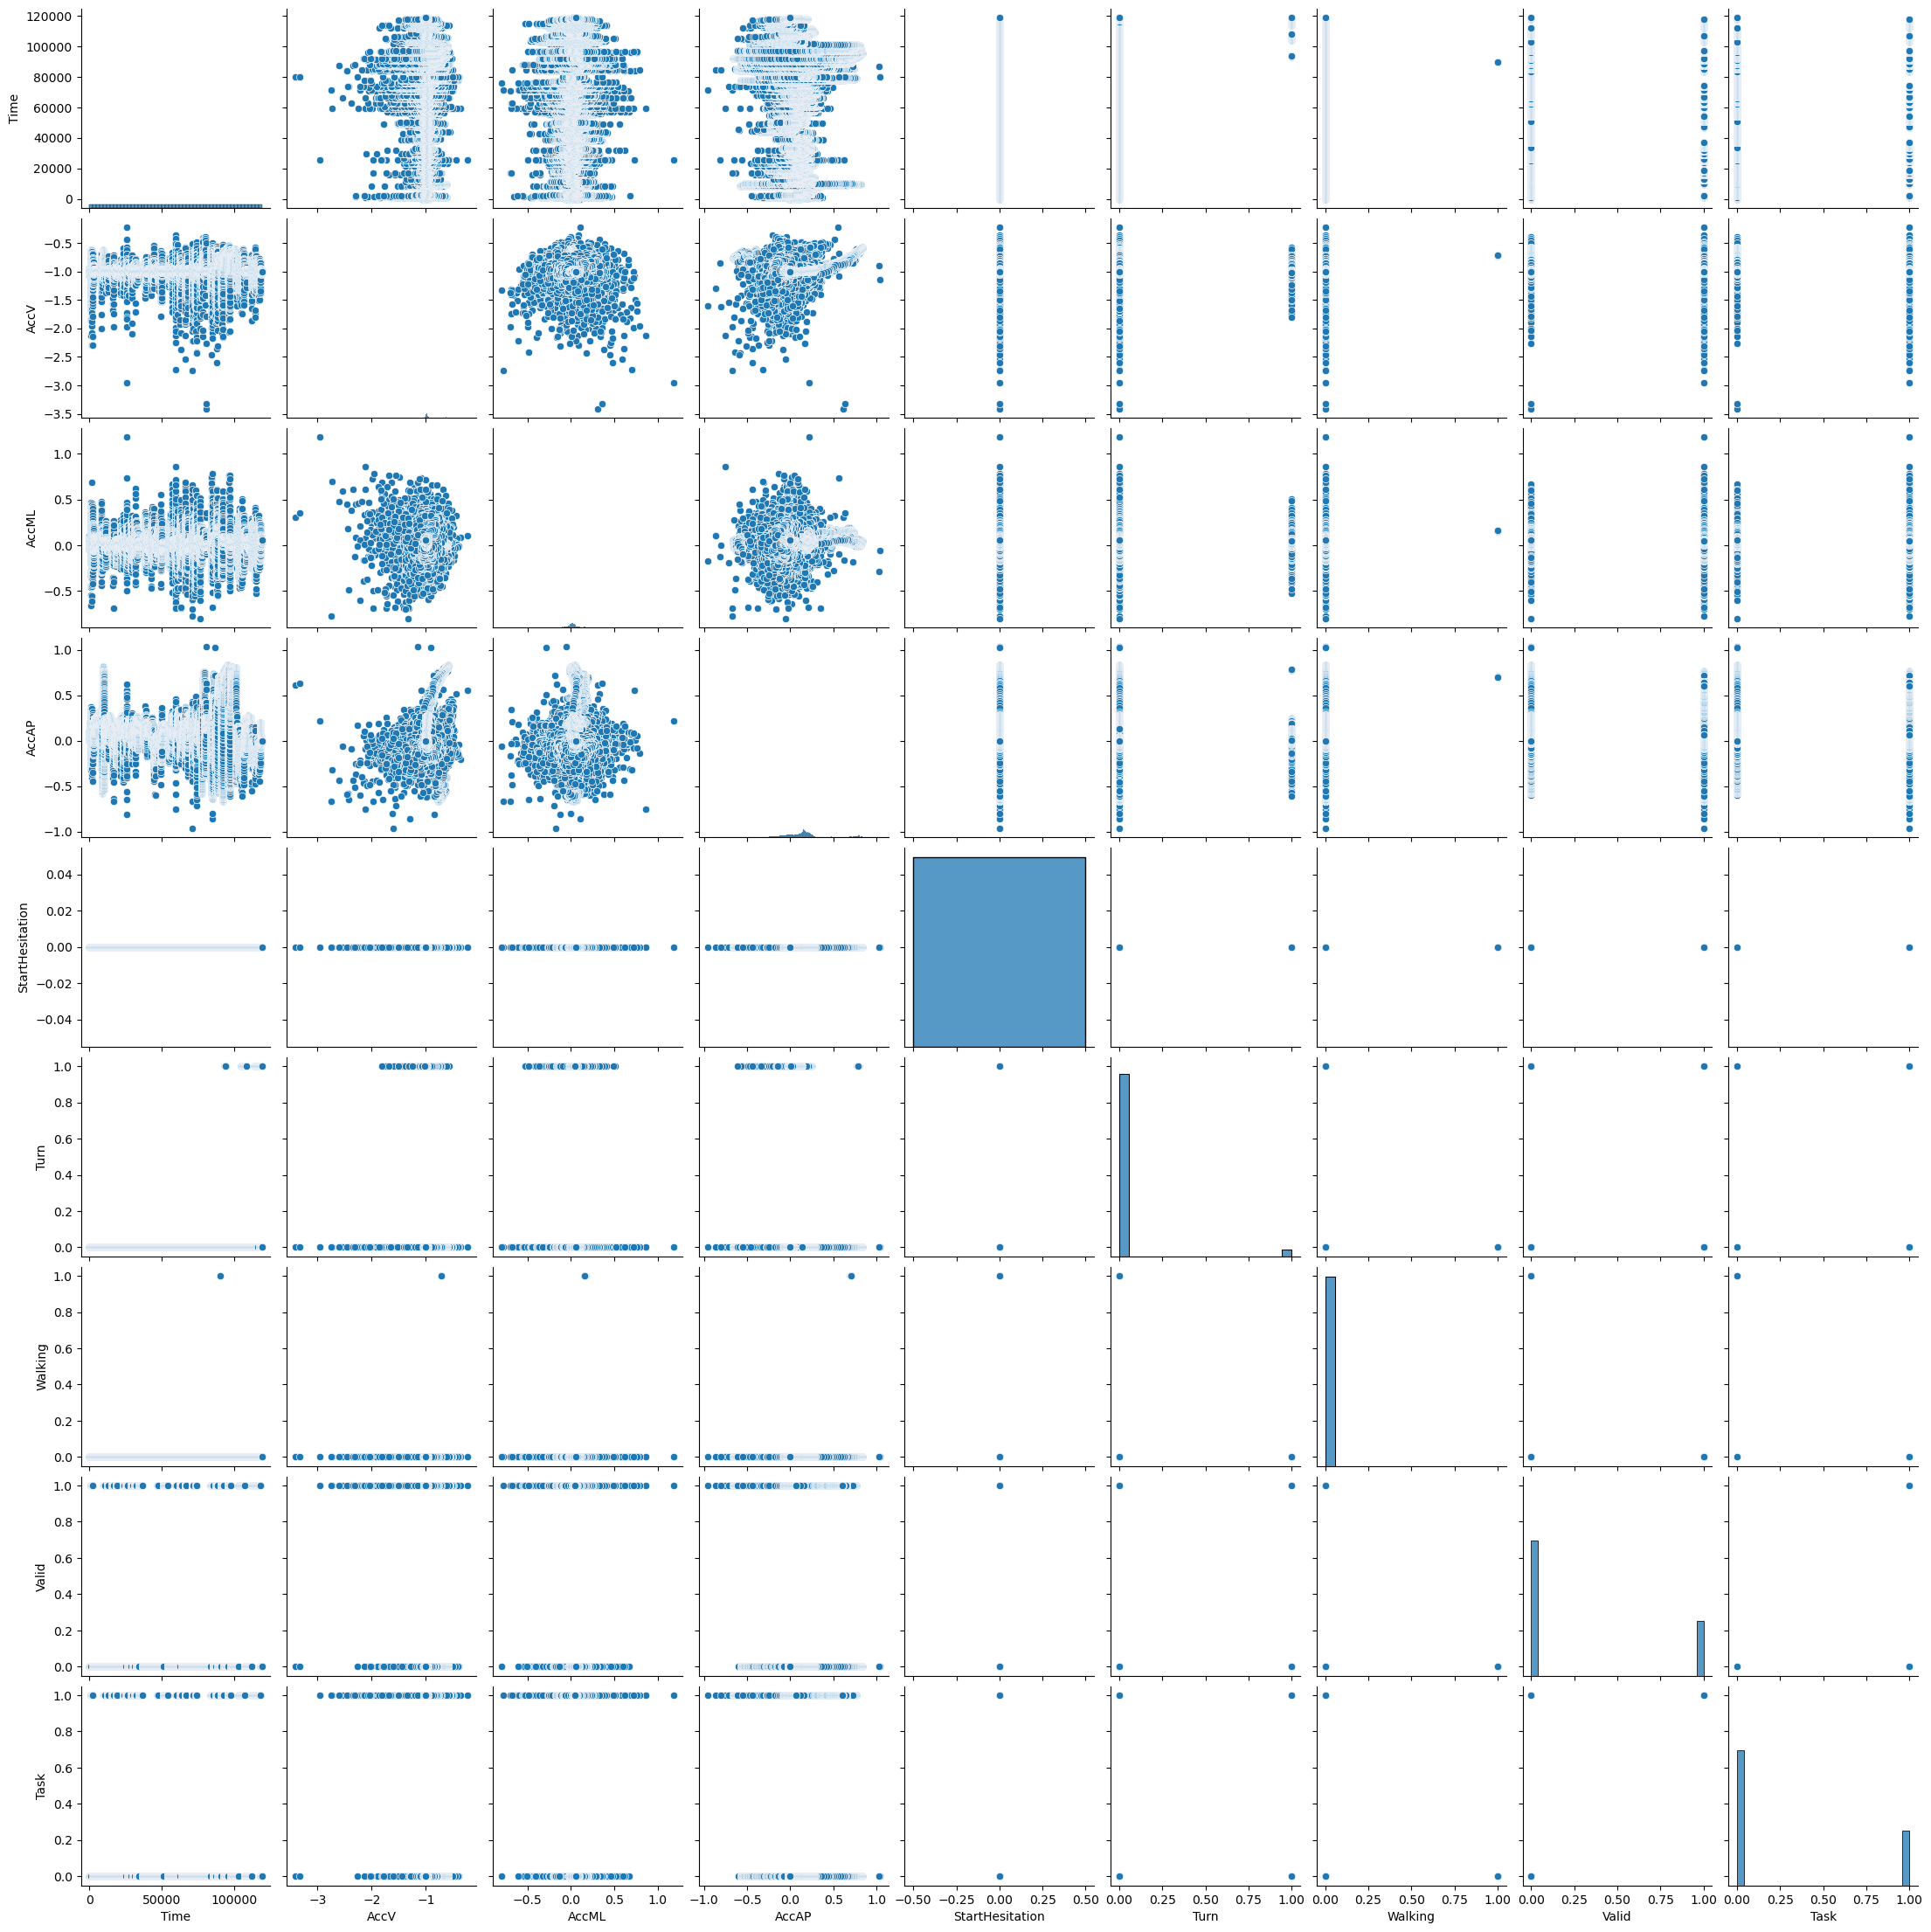

In [9]:
# create a scatter plot matrix using Seaborn
sns.pairplot(defog_example)
plt.show();

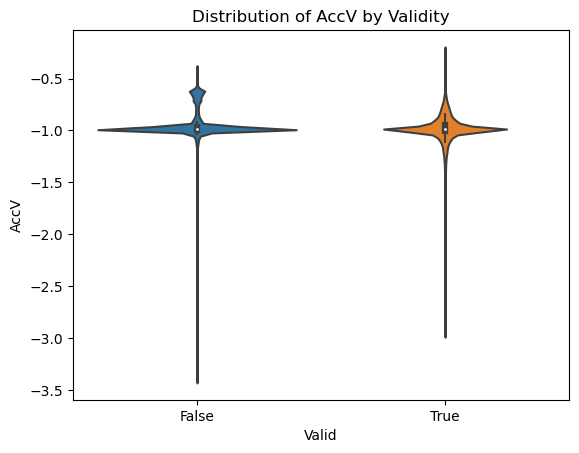

In [10]:
# create a violin plot of acceleration on the vertical axis (AccV)
sns.violinplot(x='Valid', y='AccV', data=defog_example)

# add title to the plot
plt.title('Distribution of AccV by Validity')

plt.show()

**tdcsfog_metadata.csv** Identifies each series in the tdcsfog dataset by a unique **Subject, Visit, Test, Medication condition**.

* **Visit** Lab visits consist of a baseline assessment, two post-treatment assessments for different treatment stages, and one follow-up assessment.
* **Test** Which of three test types was performed, with 3 the most challenging.
* **Medication** Subjects may have been either off or on anti-parkinsonian medication during the recording.

In [11]:
tdcsfog_meta = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv')
tdcsfog_meta

,Id,Subject,Visit,Test,Medication
0,003f117e14,13abfd,3,2,on
1,009ee11563,d81e3a,4,2,on
2,011322847a,203e85,2,2,on
3,01d0fe7266,203e85,2,1,off
4,024418ba39,cecfb8,19,3,on
...,...,...,...,...,...
828,feba449e1a,47860d,19,1,on
829,ff4f844fd3,43fcae,2,3,on
830,ff53514514,a2a051,2,3,on
831,ff92d9244d,a9e866,20,2,on


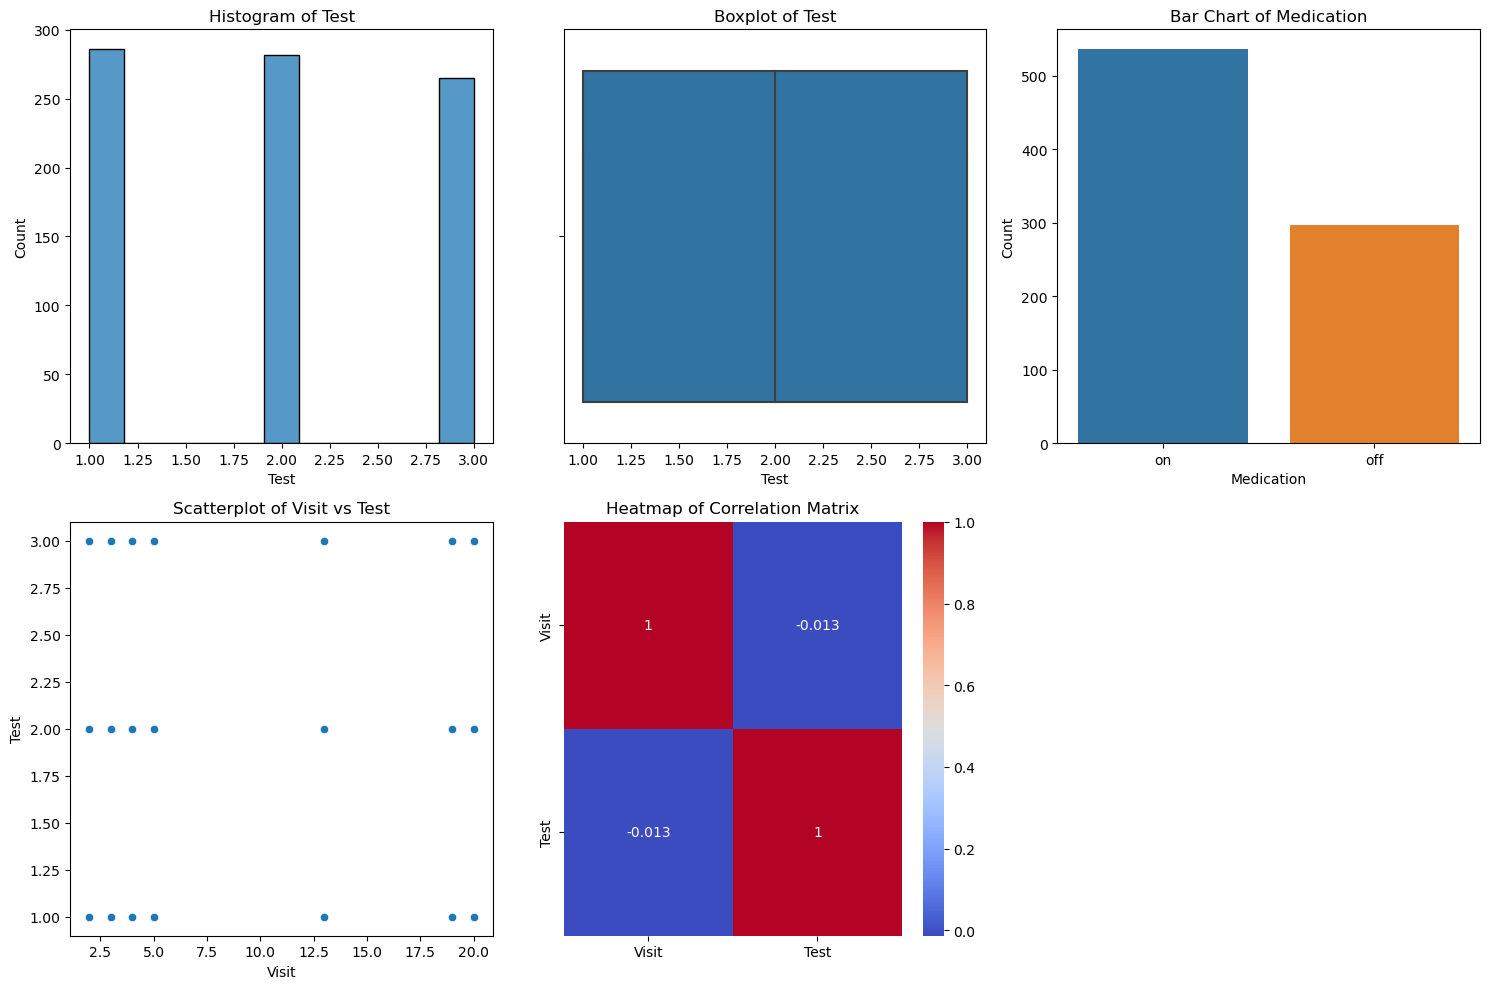

In [12]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# create histogram of Test column
sns.histplot(x='Test', data=tdcsfog_meta, ax=axes[0, 0])
axes[0, 0].set_xlabel('Test')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Histogram of Test')

# create boxplot of Test column
sns.boxplot(x='Test', data=tdcsfog_meta, ax=axes[0, 1])
axes[0, 1].set_xlabel('Test')
axes[0, 1].set_title('Boxplot of Test')

# create countplot of Medication column
sns.countplot(x='Medication', data=tdcsfog_meta, ax=axes[0, 2])
axes[0, 2].set_xlabel('Medication')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Bar Chart of Medication')

# create scatterplot of Visit vs Test
sns.scatterplot(x='Visit', y='Test', data=tdcsfog_meta, ax=axes[1, 0])
axes[1, 0].set_xlabel('Visit')
axes[1, 0].set_ylabel('Test')
axes[1, 0].set_title('Scatterplot of Visit vs Test')

# create heatmap of correlation between numerical columns
corr = tdcsfog_meta[['Visit', 'Test']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Heatmap of Correlation Matrix')

# remove empty subplot
fig.delaxes(ax=axes[1, 2])

# adjust layout and display figure
fig.tight_layout()
plt.show()

In [13]:
# count the number of records for each combination of Subject and Visit
tdcsfog_counts = tdcsfog_meta.groupby(['Subject', 'Visit']).size().reset_index(name='count')

# create a treemap of the number of records for each combination of Subject and Visit
fig = px.treemap(tdcsfog_counts, path=['Subject', 'Visit'], values='count')
fig.show()

**subjects.csv** Metadata for each Subject in the study, including their Age and Sex as well as:

* **Visit** Only available for subjects in the daily and defog datasets.
* **YearsSinceDx** Years since Parkinson's diagnosis.
* **UPDRSIIIOn/UPDRSIIIOff** Unified Parkinson's Disease Rating Scale score during on/off medication respectively.
* **NFOGQ** Self-report FoG questionnaire score. See: 
https://pubmed.ncbi.nlm.nih.gov/19660949/

## **[Unified Parkinson Disease Rating Scale](https://www.theracycle.com/resources/links-and-additional-resources/updrs-scale/)**
> *The UPDRS scale refers to Unified Parkinson Disease Rating Scale, and it is a rating tool used to gauge the course of Parkinson’s disease in patients. The UPDRS scale has been modified over the years by several medical organizations, and continues to be one of the bases of treatment and research in PD clinics. The UPDRS scale includes series of ratings for typical Parkinson’s symptoms that cover all of the movement hindrances of Parkinson’s disease. The UPDRS scale consists of the following five segments: 1) Mentation, Behavior, and Mood, 2) ADL, 3) Motor sections, 4) Modified Hoehn and Yahr Scale, and 5) Schwab and England ADL scale.*

We are provided patient scores for the 3rd motor scale UPDRS III and whether the patient was on or off medication (**UPDRSIII_On** and **UPDRSIII_Off**).

In [14]:
subjects = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv')
subjects

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.0,63,M,3.0,30.0,NaN,0
1,05595e,1.0,56,M,8.0,28.0,NaN,0
2,0967b2,1.0,59,M,10.0,38.0,48.0,19
3,0967b2,2.0,59,M,10.0,37.0,44.0,13
4,097078,NaN,70,F,10.0,27.0,50.0,20
...,...,...,...,...,...,...,...,...
168,f90887,1.0,72,M,16.0,35.0,46.0,26
169,fc1e1b,1.0,82,F,11.0,38.0,42.0,21
170,fe5d84,2.0,72,M,14.0,32.0,45.0,17
171,fe5d84,1.0,72,F,14.0,13.0,33.0,15


In [15]:
!pip install pywaffle
from pywaffle import Waffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 34.9 MB/s eta 0:00:00


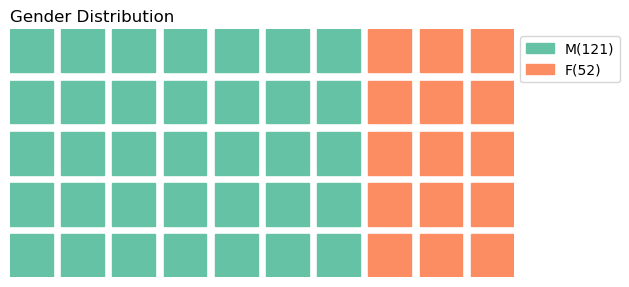

In [16]:
gender_counts = subjects["Sex"].value_counts()

plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=gender_counts,
    title={'label': 'Gender Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(gender_counts.index, gender_counts) ],
    # Set the position of the legend
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    dpi=100
)

plt.show()

(173, 8)
Subject          object
Visit           float64
Age               int64
Sex              object
YearsSinceDx    float64
UPDRSIII_On     float64
UPDRSIII_Off    float64
NFOGQ             int64
dtype: object
Subject          0
Visit           62
Age              0
Sex              0
YearsSinceDx     0
UPDRSIII_On      1
UPDRSIII_Off    41
NFOGQ            0
dtype: int64
            Visit         Age  YearsSinceDx  UPDRSIII_On  UPDRSIII_Off  \
count  111.000000  173.000000    173.000000   172.000000    132.000000   
mean     1.369369   67.763006     10.383931    34.273256     42.878788   
std      0.484823    7.972075      6.289191    12.732552     12.998550   
min      1.000000   28.000000      0.420000     5.000000     15.000000   
25%      1.000000   62.000000      6.000000    25.000000     33.000000   
50%      1.000000   68.000000      9.000000    35.000000     43.000000   
75%      2.000000   73.000000     15.000000    42.250000     49.250000   
max      2.000000   94.00000

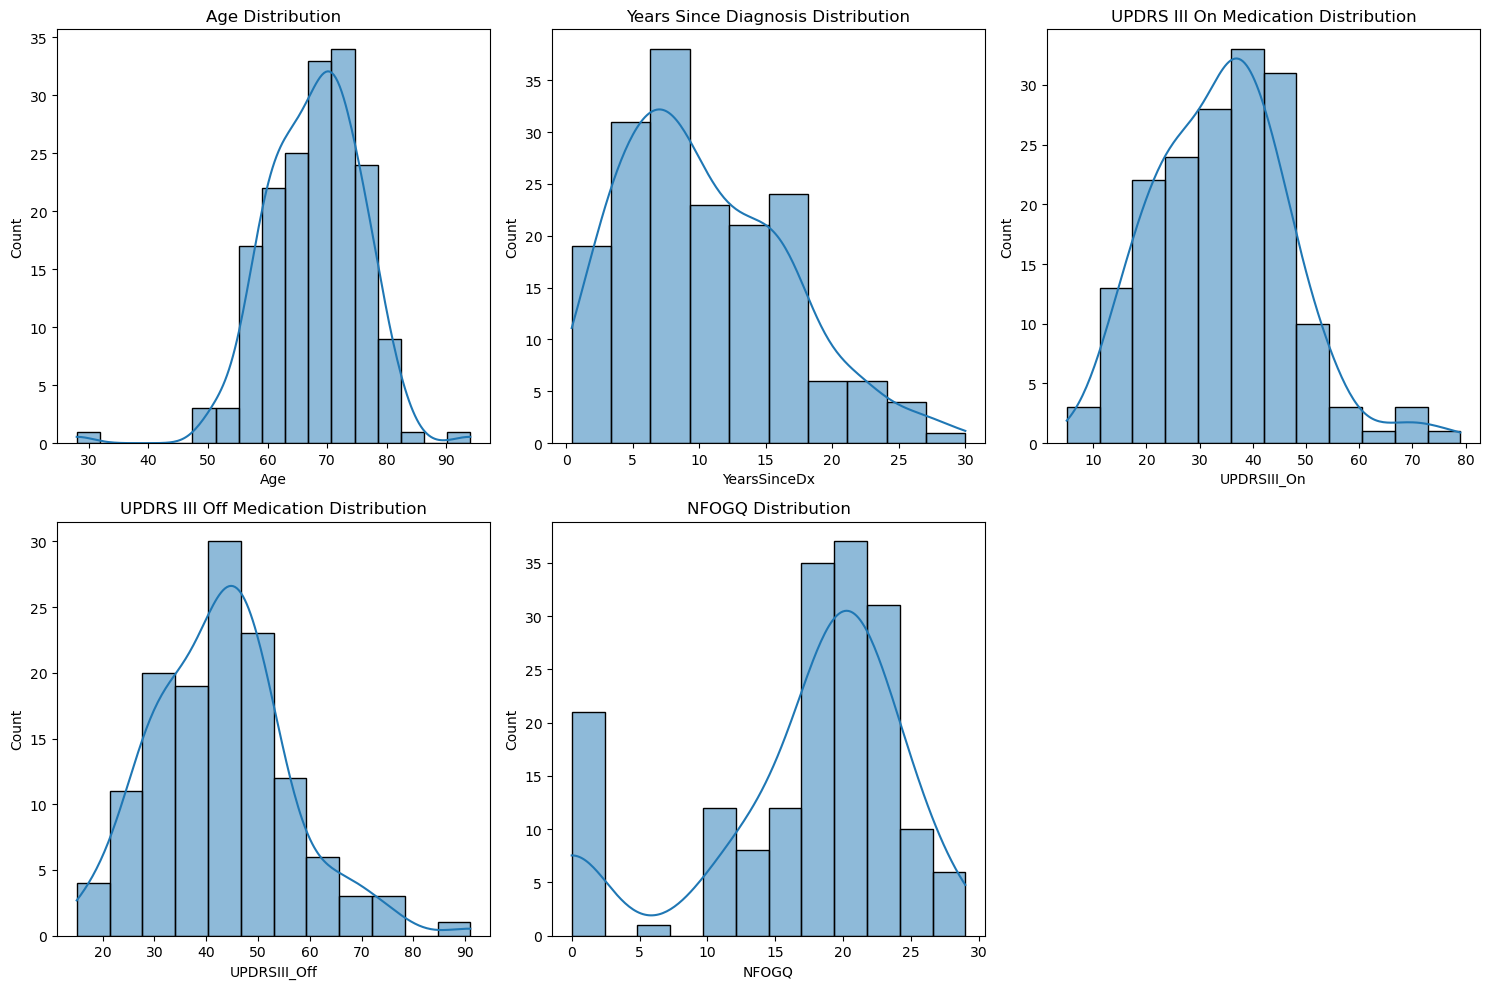

                   Age  YearsSinceDx  UPDRSIII_On  UPDRSIII_Off     NFOGQ
Age           1.000000      0.038371     0.233860      0.121052  0.053236
YearsSinceDx  0.038371      1.000000     0.296986      0.269930  0.282845
UPDRSIII_On   0.233860      0.296986     1.000000      0.645712  0.315943
UPDRSIII_Off  0.121052      0.269930     0.645712      1.000000  0.237064
NFOGQ         0.053236      0.282845     0.315943      0.237064  1.000000


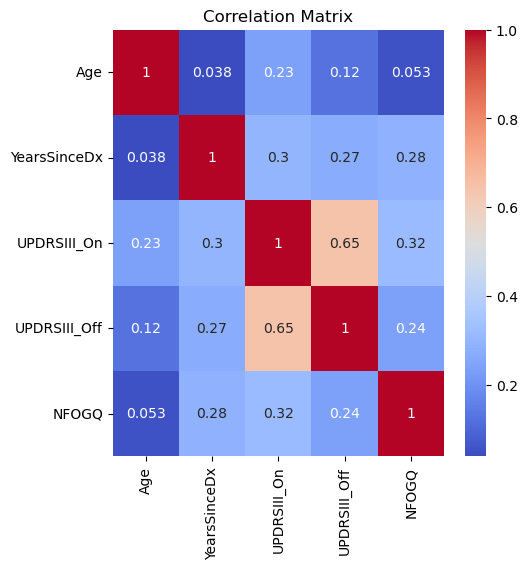

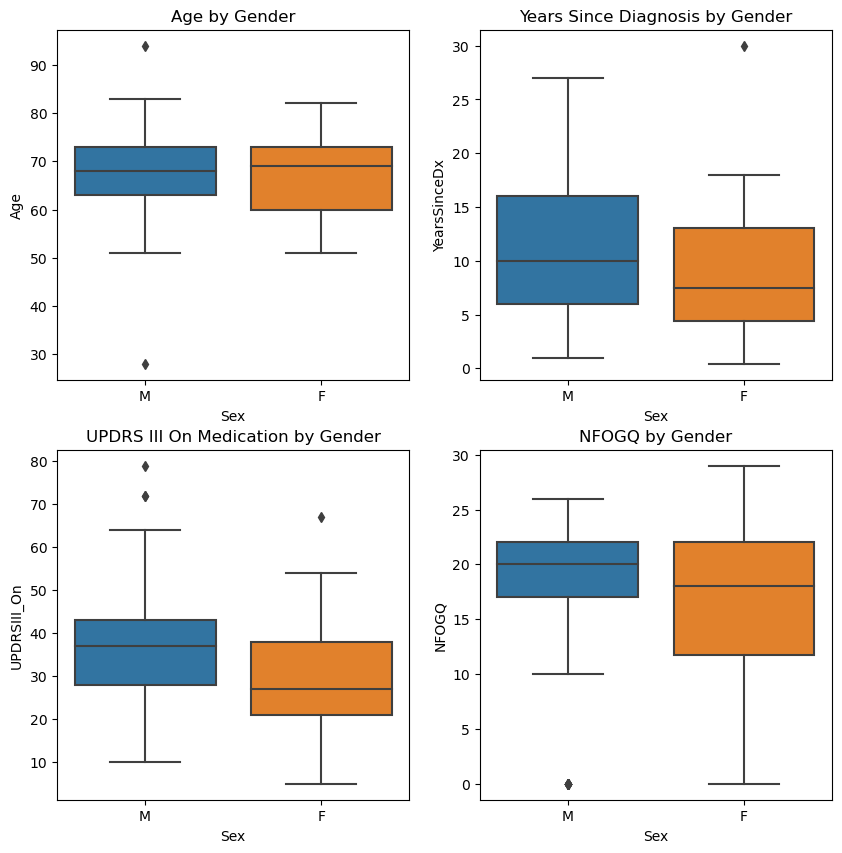

In [17]:
# Check the shape, data types, and missing values
print(subjects.shape)
print(subjects.dtypes)
print(subjects.isnull().sum())

# Check summary statistics of numerical variables
print(subjects.describe())

# Check distribution of numerical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
sns.histplot(subjects["Age"], kde=True, ax=axs[0,0]).set(title='Age Distribution')
sns.histplot(subjects["YearsSinceDx"], kde=True, ax=axs[0,1]).set(title='Years Since Diagnosis Distribution')
sns.histplot(subjects["UPDRSIII_On"].dropna(), kde=True, ax=axs[0,2]).set(title='UPDRS III On Medication Distribution')
sns.histplot(subjects["UPDRSIII_Off"].dropna(), kde=True, ax=axs[1,0]).set(title='UPDRS III Off Medication Distribution')
sns.histplot(subjects["NFOGQ"], kde=True, ax=axs[1,1]).set(title='NFOGQ Distribution')
plt.delaxes(axs[1, 2])
plt.tight_layout()
plt.show()

# Check distribution of categorical variable
sns.catplot(x="Sex", kind="count", data=subjects).set(title='Gender Distribution')

# Check correlation between numerical variables
corr = subjects[["Age", "YearsSinceDx", "UPDRSIII_On", "UPDRSIII_Off", "NFOGQ"]].corr()
print(corr)

# Visualize correlation matrix using heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm").set(title='Correlation Matrix')

# Create subplots to analyze relationship between numerical and categorical variables
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.boxplot(x="Sex", y="Age", data=subjects, ax=ax[0,0]).set(title='Age by Gender')
sns.boxplot(x="Sex", y="YearsSinceDx", data=subjects, ax=ax[0,1]).set(title='Years Since Diagnosis by Gender')
sns.boxplot(x="Sex", y="UPDRSIII_On", data=subjects, ax=ax[1,0]).set(title='UPDRS III On Medication by Gender')
sns.boxplot(x="Sex", y="NFOGQ", data=subjects, ax=ax[1,1]).set(title='NFOGQ by Gender')
plt.show()

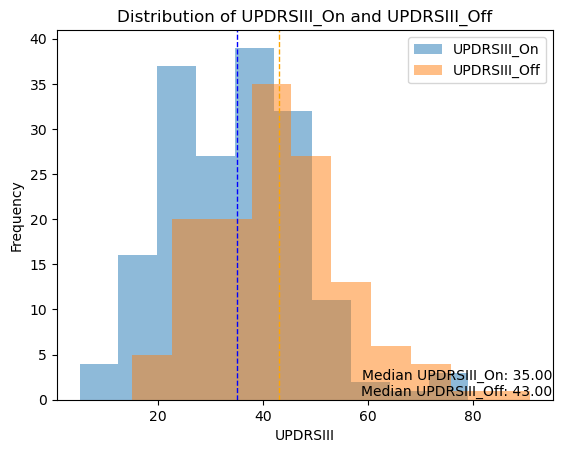

In [18]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Plot histograms for UPDRSIII_On and UPDRSIII_Off
ax.hist(subjects['UPDRSIII_On'], alpha=0.5, label='UPDRSIII_On')
ax.hist(subjects['UPDRSIII_Off'], alpha=0.5, label='UPDRSIII_Off')

# Add median lines
ax.axvline(subjects['UPDRSIII_On'].median(), color='blue', linestyle='dashed', linewidth=1)
ax.axvline(subjects['UPDRSIII_Off'].median(), color='orange', linestyle='dashed', linewidth=1)

# Set axis labels and title
ax.set_xlabel('UPDRSIII')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of UPDRSIII_On and UPDRSIII_Off')

# Add a legend
ax.legend()

# Add a text box with the median values
x_offset = 0.1
y_offset = 0.1
x_pos = ax.get_xlim()[1] - x_offset
y_pos = ax.get_ylim()[0] + y_offset
ax.text(x_pos, y_pos, f'Median UPDRSIII_On: {subjects["UPDRSIII_On"].median():.2f}\nMedian UPDRSIII_Off: {subjects["UPDRSIII_Off"].median():.2f}', verticalalignment='bottom', horizontalalignment='right')

# Show the plot
plt.show()

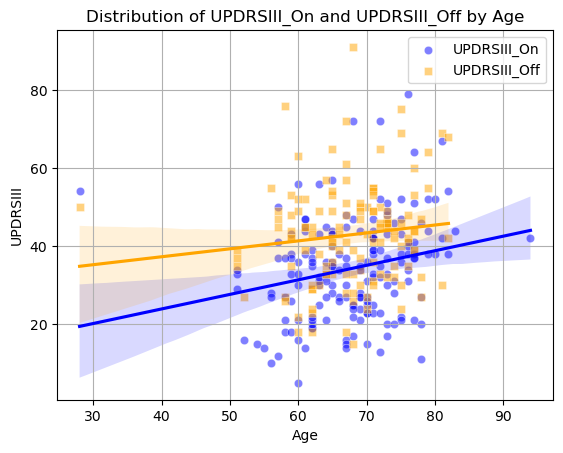

In [19]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Scatter plot of UPDRSIII_On and UPDRSIII_Off by Age
sns.scatterplot(x='Age', y='UPDRSIII_On', data=subjects, color='blue', alpha=0.5, label='UPDRSIII_On', marker='o')
sns.scatterplot(x='Age', y='UPDRSIII_Off', data=subjects, color='orange', alpha=0.5, label='UPDRSIII_Off', marker='s')

# Add a regression line
sns.regplot(x='Age', y='UPDRSIII_On', data=subjects, scatter=False, color='blue', label=None)
sns.regplot(x='Age', y='UPDRSIII_Off', data=subjects, scatter=False, color='orange', label=None)

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('UPDRSIII')
ax.set_title('Distribution of UPDRSIII_On and UPDRSIII_Off by Age')

# Add a legend
ax.legend()

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()

**events.csv** Metadata for each FoG event in all data series. The event times agree with the labels in the data series.

* **Id** The data series the event occured in.
* **Init** Time (s) the event began.
* **Completion** Time (s) the event ended.
* **Type** Whether **StartHesitation**, **Turn**, or **Walking**.
* **Kinetic** Whether the event was kinetic (1) and involved movement, or akinetic (0) and static.

In [20]:
events = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv')
events

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0
...,...,...,...,...,...
3707,f9fc61ce85,628.56000,631.6650,Walking,0.0
3708,f9fc61ce85,782.49800,782.6530,Walking,1.0
3709,f9fc61ce85,931.93900,933.4470,Turn,1.0
3710,f9fc61ce85,990.85900,991.8580,Turn,0.0


(3712, 5)
Id             object
Init          float64
Completion    float64
Type           object
Kinetic       float64
dtype: object
              Init   Completion      Kinetic
count  3712.000000  3712.000000  2669.000000
mean    988.178769   995.975486     0.811915
std     946.081452   943.655075     0.390854
min       1.020000     2.513120     0.000000
25%      45.018600    55.685525     1.000000
50%     849.584500   852.576000     1.000000
75%    1608.286250  1611.910000     1.000000
max    4425.577000  4437.105000     1.000000


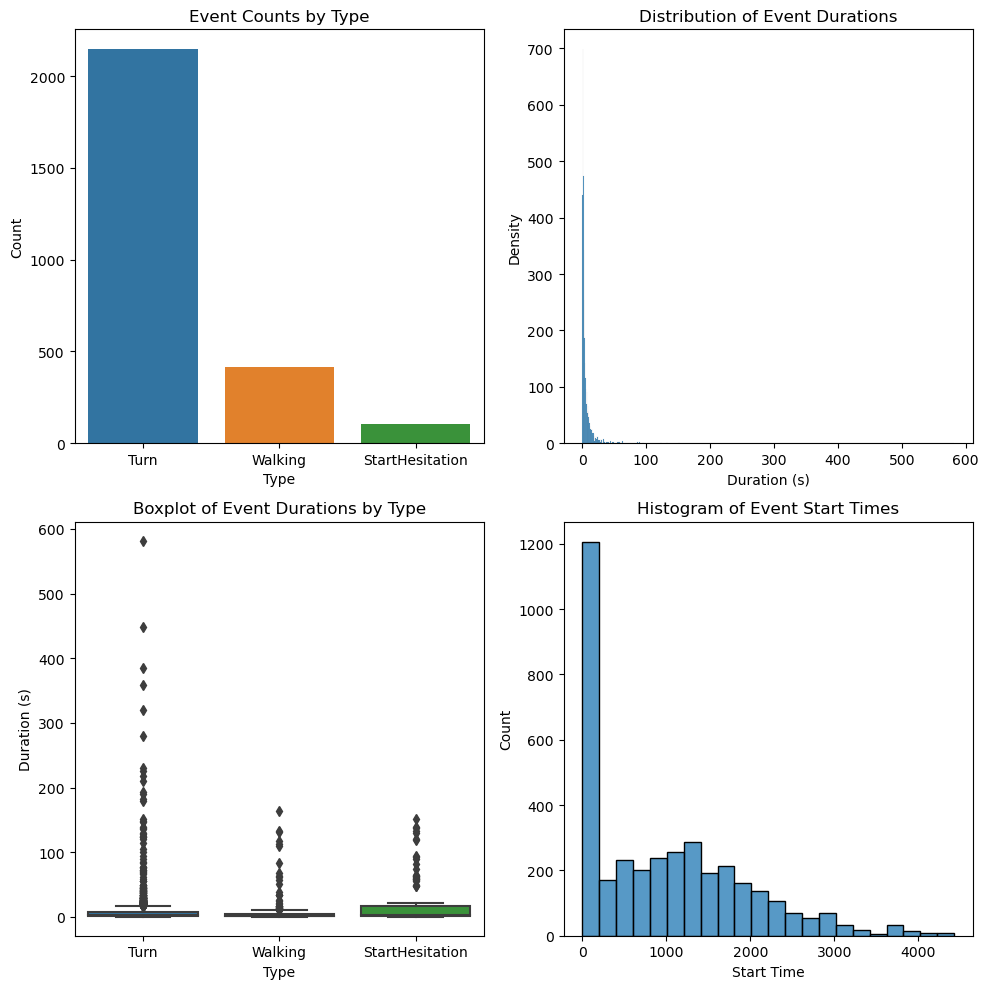

In [21]:
# Check the data
print(events.shape)
print(events.dtypes)
print(events.describe())

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the count of events by type in the first subplot
sns.countplot(x='Type', data=events, ax=axs[0, 0])
axs[0, 0].set_title('Event Counts by Type')
axs[0, 0].set_xlabel('Type')
axs[0, 0].set_ylabel('Count')

# Plot the distribution of event durations in the second subplot
sns.histplot(events['Completion'] - events['Init'], ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Event Durations')
axs[0, 1].set_xlabel('Duration (s)')
axs[0, 1].set_ylabel('Density')

# Plot the boxplot of event durations by type in the third subplot
sns.boxplot(x='Type', y=events['Completion'] - events['Init'], data=events, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Event Durations by Type')
axs[1, 0].set_xlabel('Type')
axs[1, 0].set_ylabel('Duration (s)')

# Plot the histogram of event start times in the fourth subplot
sns.histplot(x='Init', data=events, ax=axs[1, 1])
axs[1, 1].set_title('Histogram of Event Start Times')
axs[1, 1].set_xlabel('Start Time')
axs[1, 1].set_ylabel('Count')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

**tasks.csv** Task metadata for series in the defog dataset. (Not relevant for the series in the fog or daily datasets.)

* **Id** The data series where the task was measured.
* **Begin** Time (s) the task began.
* **End** Time (s) the task ended.
* **Task** One of seven tasks types in the DeFOG protocol, described on this page.
* **Description** Description of the task.

In [22]:
tasks = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv')
tasks

,Id,Begin,End,Task
0,02ab235146,10.000,190.480,Rest1
1,02ab235146,211.240,271.560,Rest2
2,02ab235146,505.880,522.400,4MW
3,02ab235146,577.960,594.640,4MW-C
4,02ab235146,701.320,715.280,MB1
...,...,...,...,...
2812,f9fc61ce85,800.586,810.714,TUG-DT
2813,f9fc61ce85,904.416,926.181,Turning-ST
2814,f9fc61ce85,959.211,989.855,Turning-DT
2815,f9fc61ce85,1087.313,1105.086,Hotspot1


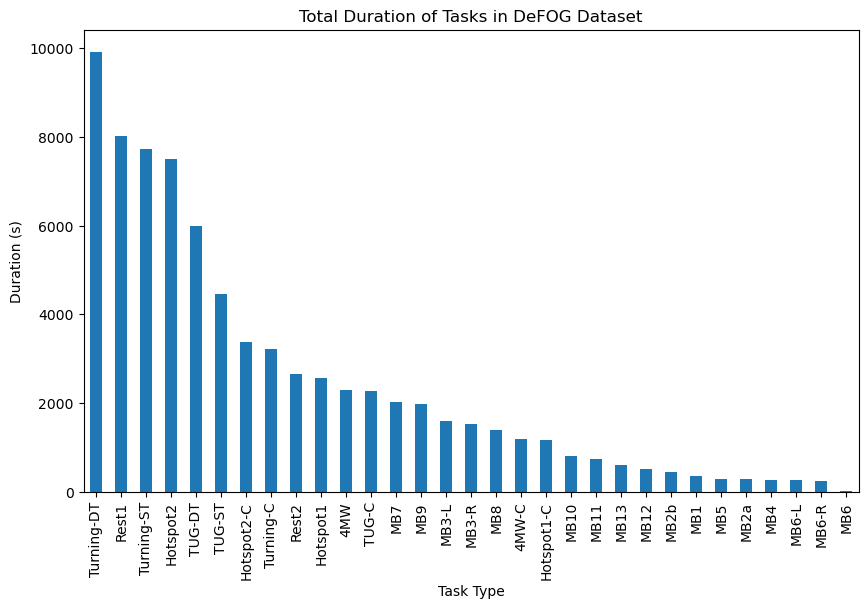

In [23]:
# Calculate task durations
tasks['Duration (s)'] = tasks['End'] - tasks['Begin']

# Group the tasks by type and calculate the sum of the duration for each group
tasks_duration = tasks.groupby('Task')['Duration (s)'].agg('sum')

# Sort the tasks by duration in descending order
tasks_duration = tasks_duration.sort_values(ascending=False)

# Create a bar plot with task types on the x-axis and task durations on the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
tasks_duration.plot(kind='bar', ax=ax)

# Set the x-axis label
ax.set_xlabel('Task Type')

# Set the y-axis label
ax.set_ylabel('Duration (s)')

# Set the title of the plot
ax.set_title('Total Duration of Tasks in DeFOG Dataset')

# Show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



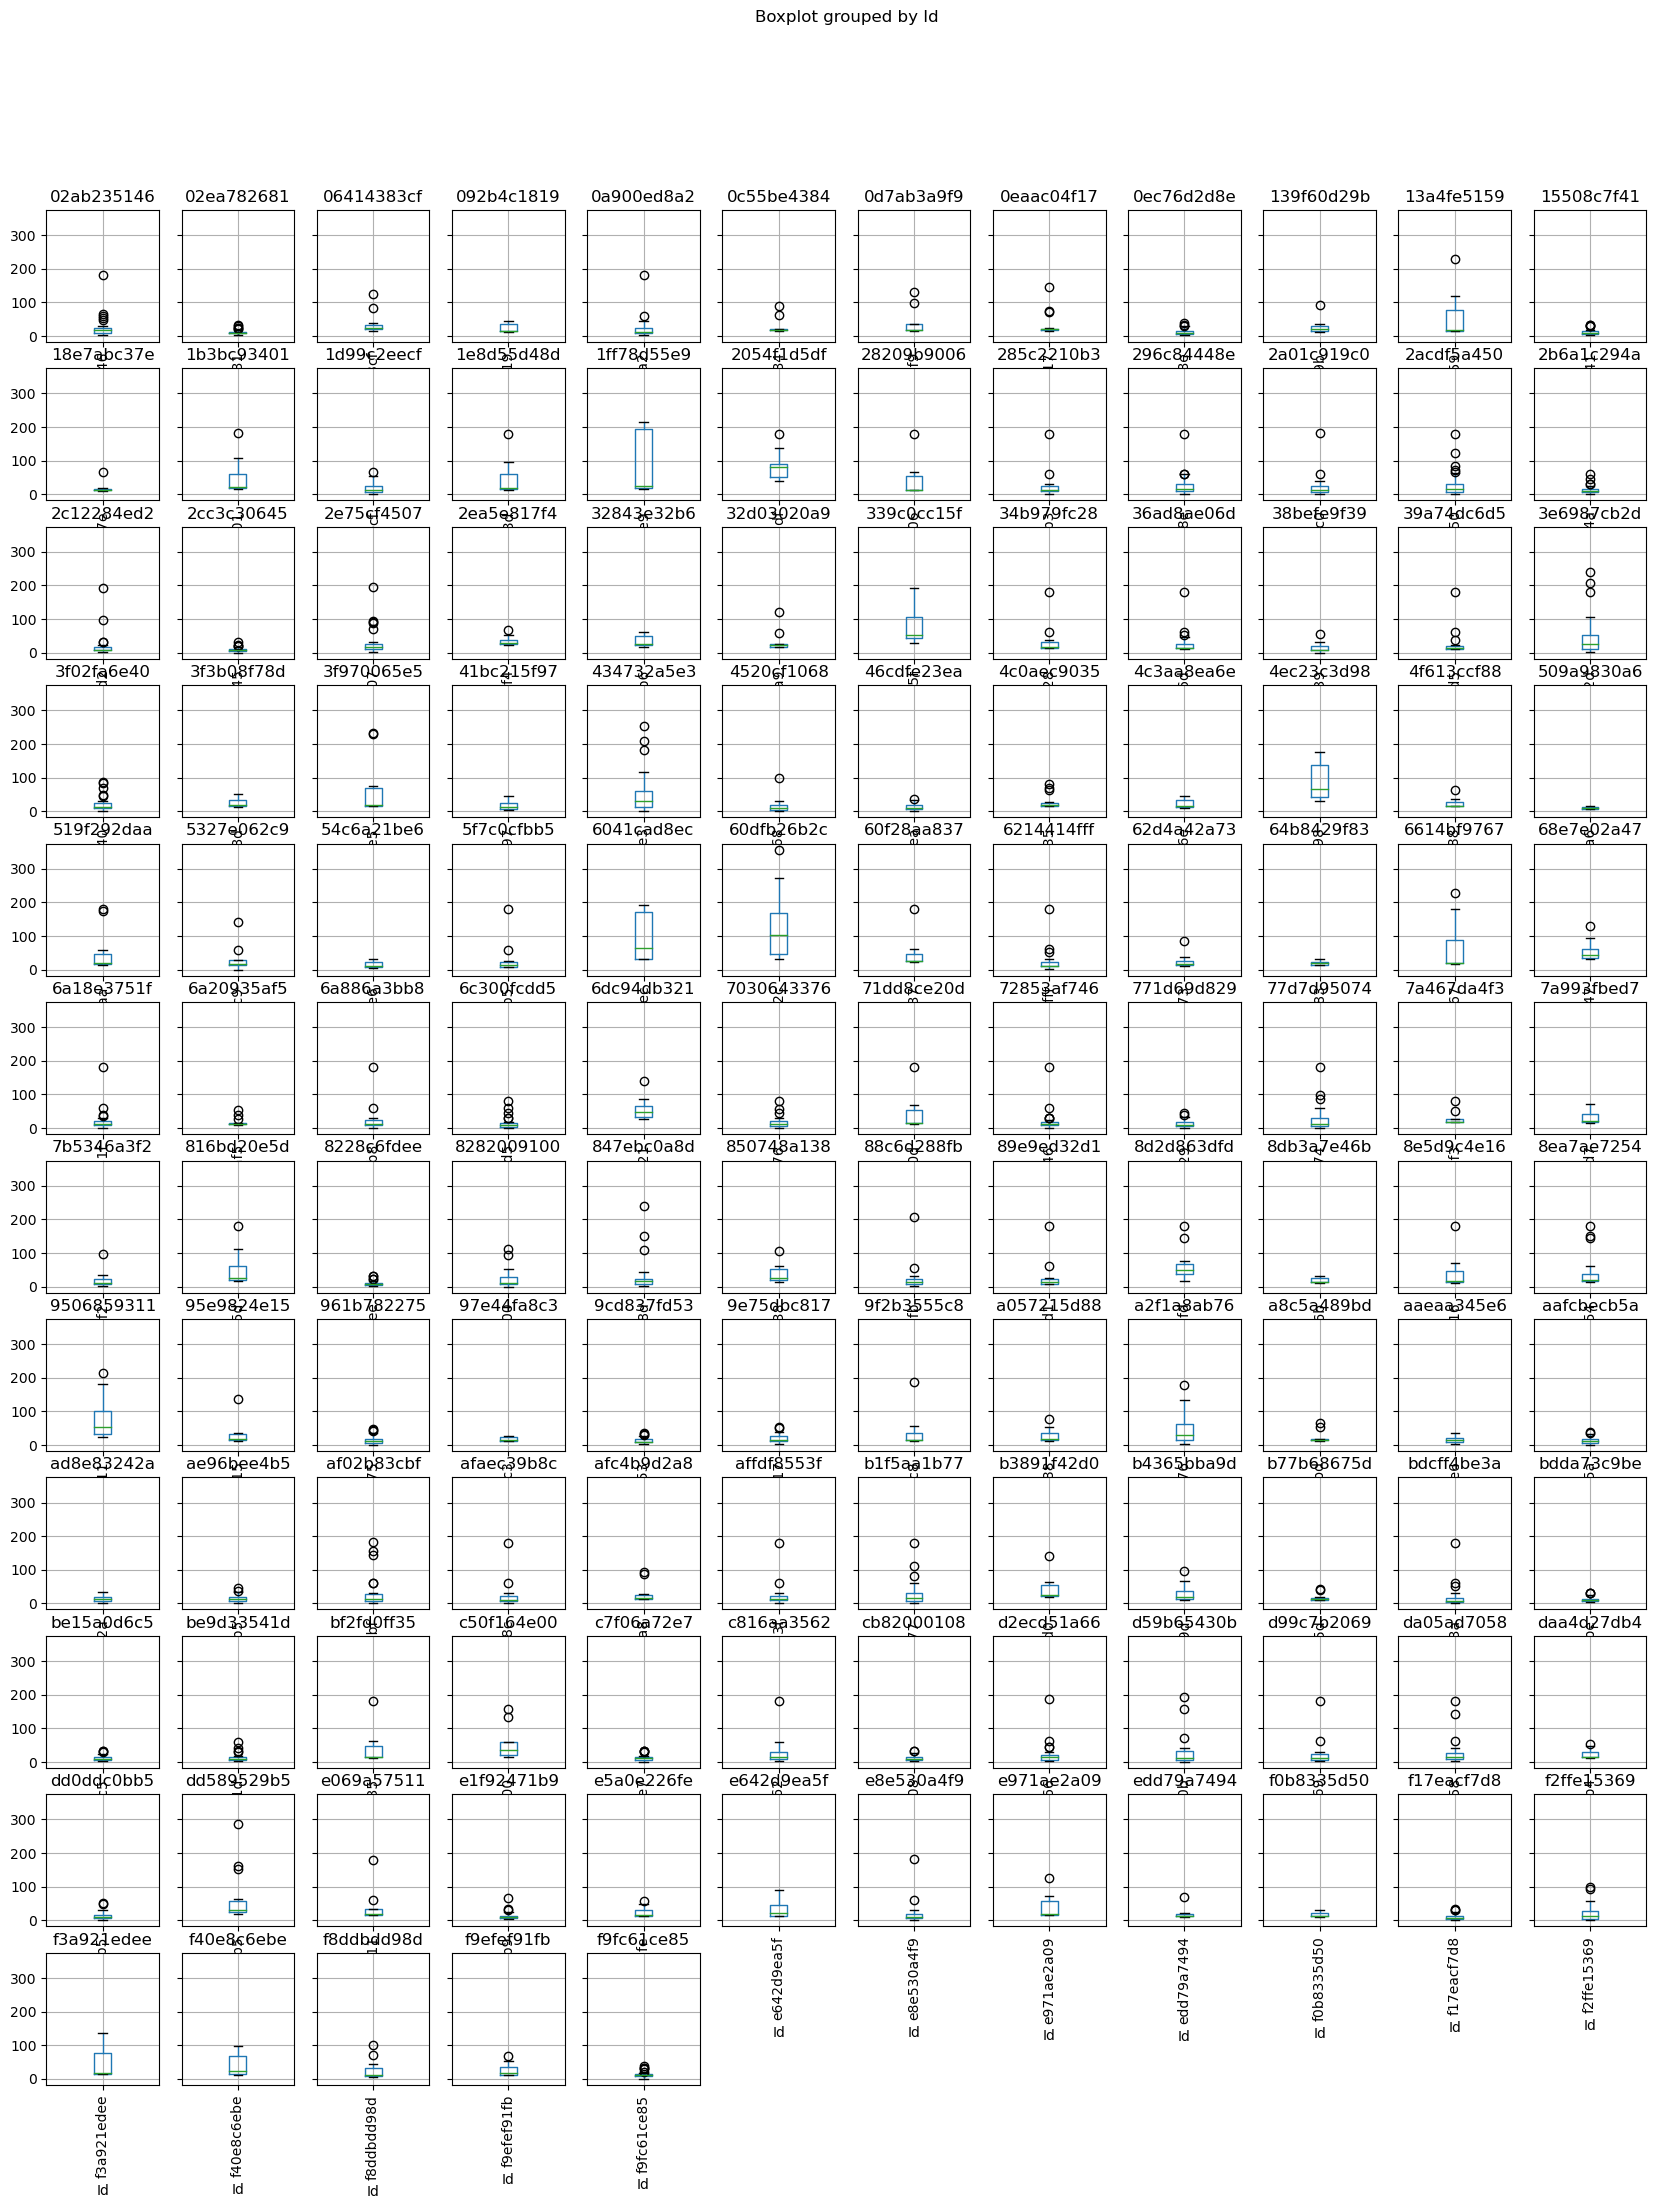

In [24]:
# Group tasks by series ID
grouped_series = tasks.groupby('Id')

# Create a box plot with series on the x-axis and task durations on the y-axis
fig, ax = plt.subplots(figsize=(20, 25))
grouped_series.boxplot(column='Duration (s)', by='Id', ax=ax, rot=90)

# Set the x-axis label
ax.set_xlabel('Series ID')

# Set the y-axis label
ax.set_ylabel('Duration (s)')

# Set the title of the plot
ax.set_title('Task Durations by Series for DeFOG Dataset')

# Show the plot
plt.show()

**daily_metadata.csv** Each series in the daily dataset is identified by the Subject id. This file also contains the time of day the recording began.

In [25]:
daily_meta = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/daily_metadata.csv')
daily_meta

,Id,Subject,Visit,Beginning of recording [00:00-23:59]
0,00c4c9313d,3d8b73,1,10:19
1,07a96f89ec,a15b56,1,07:30
2,0d1bc672a8,21e523,2,08:30
3,0e333c9833,b068a2,1,11:30
4,164adaed7b,ffa798,1,13:00
...,...,...,...,...
60,e658b0aa3d,b7bd52,1,08:00
61,ed0a487f20,268a2e,1,12:30
62,ef1db3ca64,473568,1,08:00
63,f16c5cda55,b6a627,1,08:30


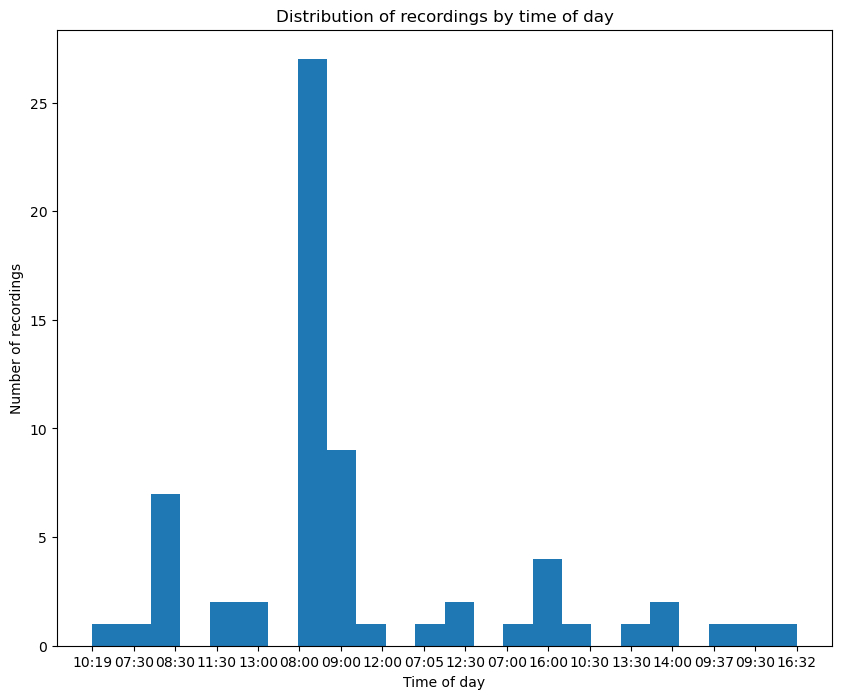

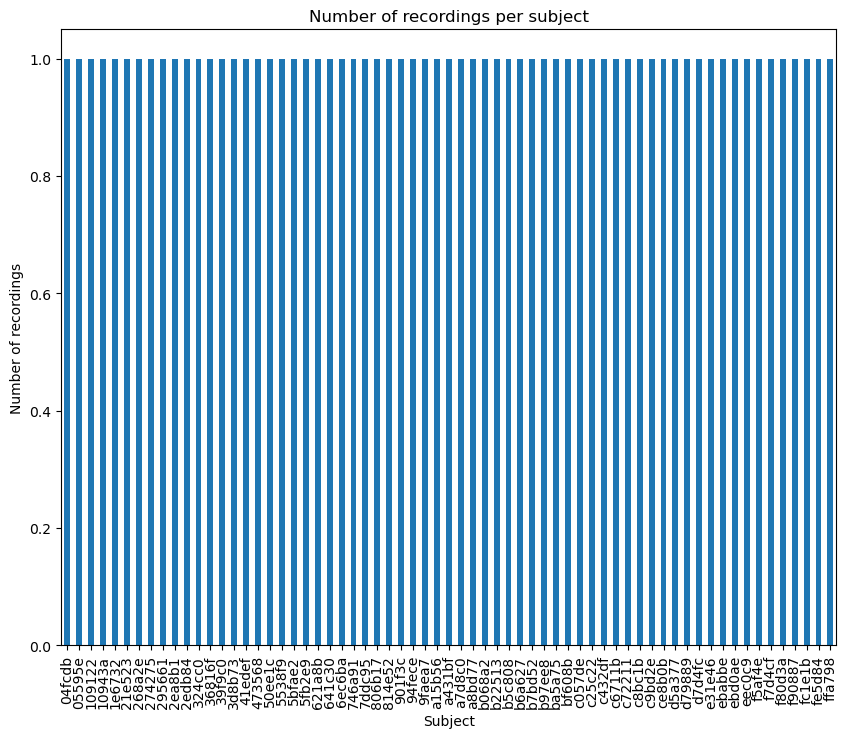

In [26]:
# plot a histogram of the distribution of recordings by time of day
plt.figure(figsize=(10, 8))
plt.hist(daily_meta['Beginning of recording [00:00-23:59]'], bins=24)
plt.xlabel('Time of day')
plt.ylabel('Number of recordings')
plt.title('Distribution of recordings by time of day')
plt.show()

# plot a bar chart of the number of recordings per subject
plt.figure(figsize=(10, 8))
daily_meta.groupby('Subject')['Id'].count().plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Number of recordings')
plt.title('Number of recordings per subject')
plt.show()